<font size=7><b> Introduction to Electrophysiology

This notebook will teach you the basics of analyzing [electrophysiology](https://en.wikipedia.org/wiki/Electrophysiology) data. In this homework we will perform some analysis on the data that Prof. Tal Sharf presented on Wednesday (April, 17). Prof. Sharf's experiment was done to determine the affects of a drug called [diazepam](https://en.wikipedia.org/wiki/Diazepam), on [cerebral organoids](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.). 



<font color="red"><b>Note:</b> This homework will be due April 18th at 11:59pm PT.  Make sure to complete the exercises at the bottom of this notebook.

In [2]:
%run "electrophysiology_source_code.ipynb"

# <font color="gray"> Reading Material

<font color="red"> Required Reading:
* [Professor Sharf's paper on Neural Circuitry](reading_material/Tal_Neural_Circuitry.pdf)
* [Spike Time Tiling Introduction](./reading_material/Spike_Time_Tiling.pdf)

Briskly read through [Professor Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf). Some of the exercises require you to read the first few pages. [This paper's](./reading_material/Spike_Time_Tiling.pdf) discussion on Spike Time Tilling is also required reading. [braingeneerspy](https://github.com/braingeneers/braingeneerspy) is the name of the python package used by the Haussler lab for data analsyis. We will be using the [analysis toolkit](https://github.com/braingeneers/braingeneerspy/tree/master/src/braingeneers/analysis) from that package..

**Other Material**
* Wiki Articles:
    * Basic wiki articles on [electrophysiology](https://en.wikipedia.org/wiki/Electrophysiology) , [diazepam](https://en.wikipedia.org/wiki/Diazepam) , [cerebral organoids](https://en.wikipedia.org/wiki/Cerebral_organoid#:~:text=A%20cerebral%20organoid%2C%20or%20brain,over%20a%20course%20of%20months.), [action potential](https://en.wikipedia.org/wiki/Action_potential)
    * Scholarpedia article on [Spike train analysis](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony)
* Research Papers
    * Review paper on [cerebral organoids](./reading_material/rise_of_organoids.pdf)
    * Professor  [Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf)
    * [Spike Time Tilling](./reading_material/Spike_Time_Tiling.pdf) paper



#  Spike Trains

## Spike Train

A "spike train" (or "spike raster") is an incredibly powerful tool used to analyze neural data. In this notebook you will learn to do some basic analysis on spike train data. A spike train is a 2D matrix where each row represents a neuron, and each column is a single moment in time. Each blue dot in the matrix is a moment in time where a neuron emits a signal to other neurons. This signal can be called a "spike", a "fire", or, more scientifically, an "action potential".


When you look at a spike train, you see every single moment at which a neuron "fires". [This link](http://www.scholarpedia.org/article/Measures_of_spike_train_synchrony) is a great resource if you want to take a deeper dive into spike train analysis. Below is the complete spike raster for the control dataset from the the experiment, `Spike_Raster_Control.mat`.

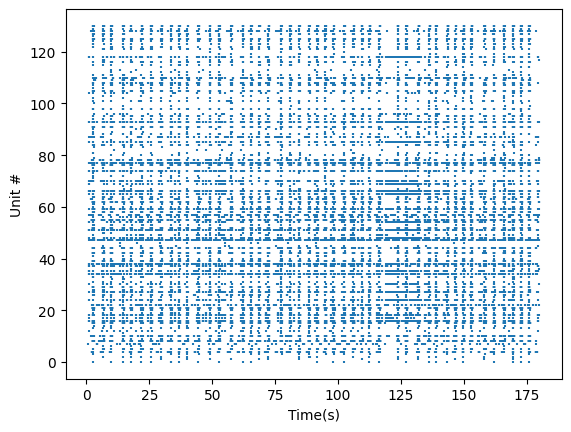

In [28]:
plot_raster(data_control)

## Analysing the Train

When scientists analyze spike trains, they are especially interested in looking at the "neural bursts" that occur. A burst is defined a short window of activity where the neurons are especially active. Looking at the spike raster above you might be able to pick out the neural bursts (the "veritcal lines"), however, bursts are easier to distinguish when you zoom in on the dataset.  

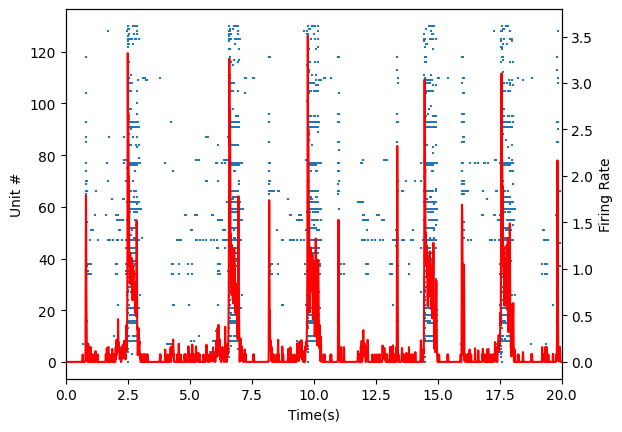

In [29]:
raster_analysis(data_control)

In the example above we have zoomed in on the first 20 seconds of the spike raster shown above. This raster also contains a red line that show the relative activity of neurons at that timestep. Looking at this 20 second window, I see **5** bursts. Defining a burst can be a little tricky. Notice that there are also areas of small activity in between bursts. Below I highlight where I see bursts and areas of activity in the spike raster.

![alt text](.images/burst_analysis.png "Title")

Neuroscientists are interested in bursts not just because they are the areas of most activity, but most importantly, because these regions display repeated patterns of consistent relationships between neurons. Below we zoom in even more on to the first two bursts of the spike raster (8 second window). Notice that the neural activity pattern (red line) looks similar for both bursts. Also, if you look at individual neurons (blue dots) you'll see that they follow similar firing patterns within both bursts.

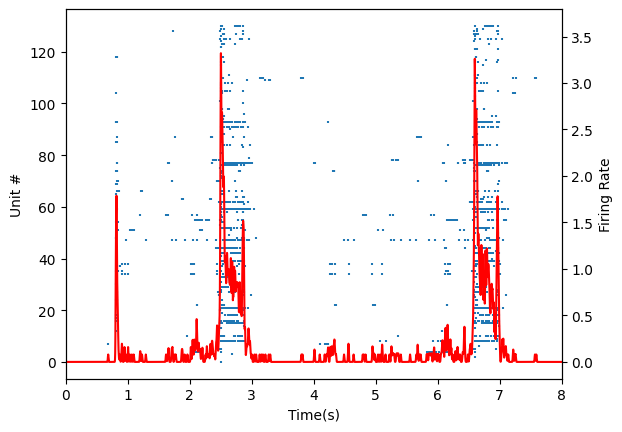

In [30]:
raster_analysis(data_control, seconds=8)

# Neural Relationships

To build the type of beautiful circuit diagrams that were discussed in class, scientists must work backwards by analyzing the firing patterns they see from neurons in the brain. They use different tools to parse out the relationship between neurons.

## Interspike Intervals

Before we attempt to answer the complicated question of "what is the relationship patterns between different neurons?", lets start with a much simpler question: "what is the relationship pattern between a single neuron and itself?". In other words, what properties can we say about the firing pattern of a single neuron?

This is a more complicated question than it might at first seem. Neurons follow a somewhat random behaviour, it is not always certain when, or how often, a neuron will fire. Lets take a "data first" approach to gain a better understanding of when neurons fire. We are going to consider the interval of time that passes in between each moment a neurons fires, this is called the interspike interval. Here is a [brief summary](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/wiki/Interspike_interval.html#:~:text=The%20interspike%20interval%20is%20the,messengers%20to%20affect%20other%20neurons.) of interspike intervals. Below we see a histogram of the interspike interval for all the neurons in our spike raster from above. What probability distribution does the graph below look like?

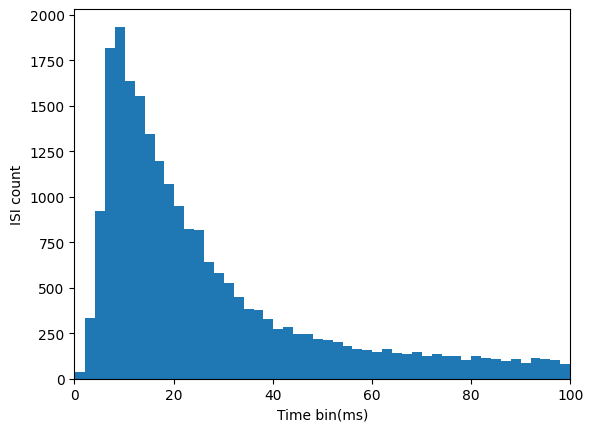

In [31]:
interspike(data_control)

<p>&nbsp</p>

<center><b>Example of Interspike Intervals</b></center>

![alt text](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/w/images/thumb/3/38/Spiketimes.png/300px-Spiketimes.png)

The mathematicians in the group will be delighted to know that intervals between spikes for a neuron tend to follow a [poission distribution](https://en.wikipedia.org/wiki/Poisson_distribution). This is not a coincidence, read the wiki article to understand why. Many of the beautiful (and complicated) statistical models used to describe the circuit patterns between neurons use the poission distribution as the fundemental building block of more complicated algorithms.

## Correlation Matrix

We have just shown that we can consider each neuron to act as a random variable, with a poission probability of firing at any given time. Given that we are now working with random variables, it is natural to use a correlation matrix to measure the relative strength in relationship between neurons. A correlation matrix displays the correlation between every pair of neurons in our spike raster. 

Below is a correlation matrix created from the spike raster above. Postively correlated neurons show up as a green dot in the plot, where negatively correlated neurons are deep blue. One could imageine strongly correlated neurons as being part of the same cicuit, or even touching. Where negatively correlated neurons may perhaps display some inhibitory cell stopping other neurons from firing. The true interpretation of a correlation matrix is much more vague than this. In reality, more nuanced techniques are used to tease apart cell circuitry. However, as the homework will show, the correlation matrix is still useful for discerning changes in neural behaviour.

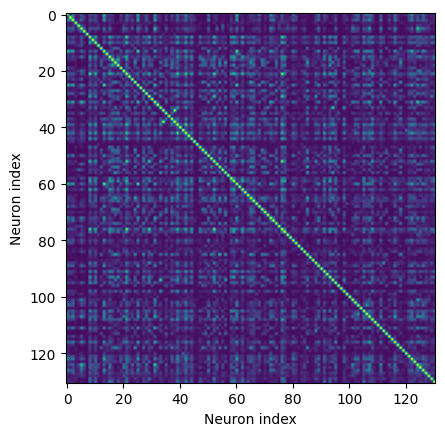

In [32]:
correlation(data_control)       

<p>&nbsp</p>
<center><b>Summary of Correlation</b></center>

![alt text](https://www.mathsisfun.com/data/images/correlation-examples.svg)

# <font color="red">Exercises 33/33

The exercises below will provide you with a better understanding of how neural data is analyzed. Note, when completing these exercises, please remember to show your work. If you typed any code to find a solution, please write down your code.

## Prof. Sharf's Paper (5 Points Total) <font color="red"> 5/5

Read through the first few pages of [Professor Sharf's paper](reading_material/Tal_Neural_Circuitry.pdf). Then answer the following questions.

### Breakthrough Device (3 Points)

What newly developed device has enabled high-resolution readouts of neural activity? What is the name of the specific device (model/maker) used in this paper? How many electrodes can it record from simultaneously?

<font color="green"><b>Answer <font color="red"> 3/3 well detailed response!

There were actually two newly-developed CMOS-based devices used in this paper. The first was the MaxOne microelectrode array (MEA) from Maxwell Biosystems, which contains 26,400 electrodes, with 1,024 channels recordable simultaneously. This was used for mapping activity across __organoid slices__. The second was the Neuropixels CMOS shank probe, a high-density linear array with 960 electrodes spaced approximately 20 μm apart. This was used to record spiking activity throughout the depth (z-plane) of __intact whole organoids__.

### Organoid Models (2 Points)

How long was neural activity recorded for after the cerebral organoid was placed on the recording device? What is the name of 2 drugs that were used to change the neural activity of organoids in the experiment?

<font color="green"><b>Answer <font color="red"> 2/2

Neural activity was recorded for up to six months after the cerebral organoid was placed on the recording device. Spontaneous spiking activity typically began around two weeks post-placement and increased in complexity over time, with synchronized bursting becoming prominent by six to seven months. Sharf et al monitored the evolving dynamics of the organoid networks, documenting coherent oscillations, functional connectivity, and pharmacologically-induced changes using tetrodotoxin and diazapam.

If you're asking about individual recording sessions, it doesn't mention exact length. It does show that neural activity was stable over minutes-long to multi-hour timescales. For example, Sharf et al noted that pairwise spike correlation patterns and network connectivity metrics remained consistent for over four hours under control conditions. Because of the enormous size of the data files, they most likely took 10-15 minute recordings every hour. 

## Curating Raw Data (2 Points Total) <font color="red"> 2/2

When a neuron emits a signal to other cells, it can be called a "spike", a "fire", or, more scientifically, an "action potential". The spike raster that you saw in the lecture above is the final product from considerable work done on the "raw data" recorded from electrodes. A microscopic 2D grid of electrodes calledn an [MEA](https://ars.els-cdn.com/content/image/1-s2.0-S0165027099001132-gr1.jpg) records an "action potential" across multiple locations of the neuron's body. This [wiki article](https://en.wikipedia.org/wiki/Action_potential), gives a good example of what an action potential looks like. A major step in the process of finding neurons from raw data, involves looking at "footprints" of action potentials from prospective neurons. These "footprints" are representative 2D depictions of raw data coming from electrods on the MEA. The **4** images below are footprints of prospective neurons.



For the **4** images below, classify them as either being an "action potential" or as being "noise". When determinning if a "neural footprint" is a spike or noise, consider the following-  The "spike" should be seen across multiple electrodes, furthermore, the neuron should remain consistent across multiple electrodes. There shouldn't be any significant changes in it's appearance.

<font color="orange"><b>Hint:</b> **2** of the images below are action potentials, and the other **2** are noise.

<font color="green"><b>Answer

<b>Image 1:</b> Action potential

<b>Image 2:</b> Noise.

<b>Image 3:</b> Action potential.

<b>Image 4:</b> Noise.

<b><center>Image 1</center></b>
![alt text](.images/spike1.png "Title")

<b><center>Image 2</center></b>
![alt text](.images/spike2.png "Title")

<b><center>Image 3</center></b>
![alt text](.images/spike3.png "Title")

<b><center>Image 4</center></b>
![alt text](.images/spike4.png "Title")

## Analyzing Control Dataset (5 Points Total) <font color="red"> 5/5

In this section we will calculate some summary statistics on the control dataset, `data_control`. `data_control` is a `SpikeData` object created using the [analysis package](https://github.com/braingeneers/braingeneerspy/blob/master/src/braingeneers/analysis/analysis.py) from the braingeneerspy python library.

### Basic Summary (3 Points)

Lets start my getting a basic summary of the spike raster, `data_control`. How many neurons are there in the recording? How long is the recording (in seconds)? In total, how many spikes occured across all neurons?

<font color="orange">**Hint:** While this question may at first appear oubvious, getting the answer with code may be harder than you expect. This is because `data_control` is coded as a sparse matrix to save on memory. One way of going about this answer is by looking at the variable `length` and some of the code inside of the `rates` function. Another approach is to use the function `raster` with bin size of 1.


<font color="green"><b>Answer <font color="red"> 3/3

In [33]:
num_neurons = len(data_control.rates())
recording_length_sec = data_control.length / 1000
total_spikes = int(sum(data_control.rates() * data_control.length))

print(f"Number of neurons: {num_neurons}")
print(f"Recording duration: {recording_length_sec:.1f} seconds")
print(f"Total number of spikes: {total_spikes}")

Number of neurons: 131
Recording duration: 179.9 seconds
Total number of spikes: 31756


### Calculate Firing rate (1 Point)

The firing rate of a neuron is a measure of how often the cell fires. It is defined as the total number of spikes divided by total time (in seconds):

$$
\dfrac{\text{spikes}}{\text{time}}
$$

What is the average firing rate for a single neuron in the control dataset?

<font color="orange">**Note:** Here we are asking for the number of spike per second per neuron- aka: the firing rate of the entire recording divided by the number of neurons in the recording.

<font color="green"><b>Answer <font color="red"> 1/1

In [34]:
# Total spikes from all neurons
total_spikes = int(sum(data_control.rates("Hz")) * (data_control.length / 1000))  # rates in Hz * duration (s)

# Number of neurons
num_neurons = len(data_control.rates())

# Recording duration in seconds
recording_duration_sec = data_control.length / 1000

# Average firing rate per neuron
avg_firing_rate_per_neuron = total_spikes / (recording_duration_sec * num_neurons)

print(f"Average firing rate per neuron: {avg_firing_rate_per_neuron:.2f} Hz")


Average firing rate per neuron: 1.35 Hz


### Calculate Coefficient of Variation (1 Point)

Given the interspike intervals (ISI's) of a dataset, the "Coefficient of Variation" (CV) is defined as the standard deviation of the ISI's divided by the mean.

$$
\dfrac{\text{sd}\begin{pmatrix}\text{ISI}\end{pmatrix}}{\text{mean}\begin{pmatrix}\text{ISI}\end{pmatrix}}
$$

In neuroscience the CV is commonly used as a measure of randomness in the dataset. A CV of of 1 means that the data folllows a more poission-like distribution. A smaller number for the CV tends to mean that the data is less random. Calculate the CV for the control dataset.

<font color="orange">**Hint:** Use the code inside of the `interspike` function for your ISI's, however, please make sure not to use the variable `isis_raw` when doing the CV calculation.

<font color="green"><b>Answer <font color="red"> 1/1

In [35]:
# Get all interspike intervals (ISIs)
isis_raw = data_control.interspike_intervals()

# Collect all ISIs < 100 ms into a single list
filtered_isis = []
for neuron_isis in isis_raw:
    filtered = neuron_isis[neuron_isis < 100]
    filtered_isis.extend(filtered.tolist())

# Calculate CV: standard deviation divided by mean
cv = np.std(filtered_isis) / np.mean(filtered_isis)

print(f"Coefficient of Variation (CV): {cv:.2f}")


Coefficient of Variation (CV): 0.83


## Analyzing Diazepam Dataset (11.5 Points Total) <font color="red"> 11.5/11.5

In this section we will analyze the results from the cerebral organoid after it was given the drug Diazepam. Specifically, we will be comparing these results the control data to see what affects diazepam has on the tissue.

<font color="orange">**Hint:** When answering the questions below, it's important to remember the general affect that Diazepam has on neurons. In general, diazepam **decreases neural activity**, however, firing patterns between neurons become **more organized** and less random. 

### Load Data (1 Point)

Create a variable called `data_diazepam` which loads the data from `Spike_Raster_Diazepam.mat` into a Braingeneerspy `SpikeData` object. Note, this is the same way we load the control dataset in the source code.

<font color="green"><b>Answer <font color="red"> 1/1

In [36]:
data_diazepam = mat_to_spikeData('/home/jovyan/data/ephys/2023-08-28-e-Math_Mind_Class/HW2-Electrophysiology/Spike_Raster_Diazepam.mat')
print(data_diazepam)



### Basic Summary (3 Points)

For the dataset, `data_diazepam`, calculate how many neurons there are, how long the recording is (in seconds), and the total number of spikes that occured.

<font color="green"><b>Answer <font color="red"> 3/3

In [37]:
# Number of neurons
num_neurons = len(data_diazepam.train)

# Recording duration in seconds (data_diazepam.length is in milliseconds)
recording_duration_sec = data_diazepam.length / 1000

# Total number of spikes across all neurons
total_spikes = sum(len(train) for train in data_diazepam.train)

# Output the results
print(f"Number of neurons: {num_neurons}")
print(f"Recording duration: {recording_duration_sec:.1f} seconds")
print(f"Total number of spikes: {total_spikes}")


Number of neurons: 131
Recording duration: 180.0 seconds
Total number of spikes: 20971


### Firing Rate (1 Point)

What is the average firing rate for a single neuron in the diazepam dataset?  How does this compare to the control dataset? Is this consistent with what we expect from Diazepam?

<font color="orange">**Note:** Like before, we are asking for the number of spike per second per neuron

<font color="green"><b>Answer <font color="red"> 1/1

In [38]:
# Control
firing_rate_control = 31756 / (179.9 * 131)

# Diazepam
firing_rate_diazepam = 20971 / (180.0 * 131)

print(f"Control average firing rate: {firing_rate_control:.2f} Hz")
print(f"Diazepam average firing rate: {firing_rate_diazepam:.2f} Hz")


Control average firing rate: 1.35 Hz
Diazepam average firing rate: 0.89 Hz


Diazepam decreased the average firing rate from ~1.35 Hz to ~0.89 Hz.

This is consistent with the known effect of diazepam, which:

- Enhances GABAergic inhibition

- Suppresses overall neural excitability

- Decreases spike rates while increasing temporal precision and reducing randomness

Yes, this result is exactly what we’d expect pharmacologically.

### Calculate Coefficient of Variation (1 Point)

Calculate the CV score for Diazepam dataset. Compare your result to the control dataset. Is this result consistent with the general affects we expect from Diazepam?

<font color="green"><b>Answer <font color="red"> 1/1

In [39]:
isis_raw = data_diazepam.interspike_intervals()

filtered_isis = []
for neuron_isis in isis_raw:
    filtered = neuron_isis[neuron_isis < 100]
    filtered_isis.extend(filtered.tolist())

cv_diazepam = np.std(filtered_isis) / np.mean(filtered_isis)
print(f"Diazepam CV: {cv_diazepam:.2f}")


Diazepam CV: 0.60


While the control CV was approximately 0.83, indicating moderately variable spiking, the diazepam CV is around 0.60, reflecting more regular and less random spiking behavior. Diazepam suppresses overall neural activity by enhancing GABAergic inhibition, but it also tends to increase the temporal precision of firing. 

A lower CV implies that interspike intervals are more consistent, supporting the idea that neurons fire in a more organized, structured pattern under the influence of diazepam.

The lower CV + reduced firing rate = behavior aligned with diazepam’s role in decreasing excitability while increasing firing regularity.

### Bursting Behaviour (4 Points)

#### Macro

Create a zoomed in plot of the spike raster for the diazepam dataset that shows the first 20 seconds of the recording. How many bursts do you see? How does this compare to the number of bursts you saw in the control dataset? Are these results consistent with figures in Tal's paper? If so, which figure?

<font color="green"><b>Answer <font color="red"> 2/2 we do want to see figure for both but your analysis shows you did get both so full marks

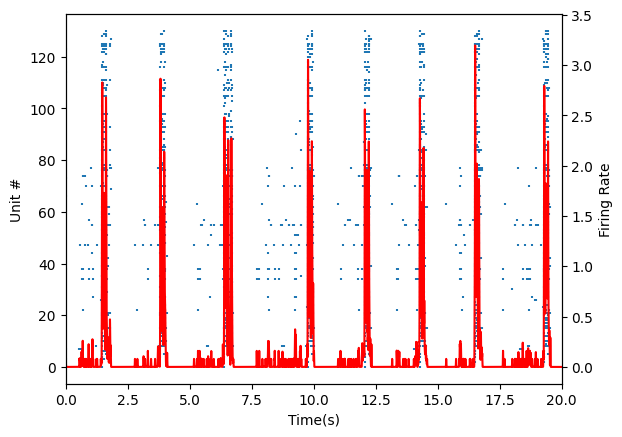

In [41]:
raster_analysis(data_diazepam, seconds=20)


In the first 20 seconds of the recording, the control dataset exhibits approximately __5__ population bursts, while the diazepam-treated dataset shows __8__. __The increase in burst frequency accompanies a change in burst structure — the bursts become more regular, more tightly spaced, and more consistent in their amplitude__. This is consistent with the known effects of diazepam, which reduces overall neural activity while enhancing the synchronization and temporal precision of neuronal firing. 

These observations align well with __Figure 4a–c__ in Tal's paper, where diazepam is shown to reduce the variability between bursts and promote a more rhythmic, organized firing pattern at the network level.

#### Micro

Create a graph that zooms in on the first **2** bursts from the Diazepam dataset. Compare this to the first **2** bursts of the control dataset. Inside of a burst do the neural acivity patterns look different? If so how?

<font color="green"><b>Answer <font color="red"> 2/2 ditto

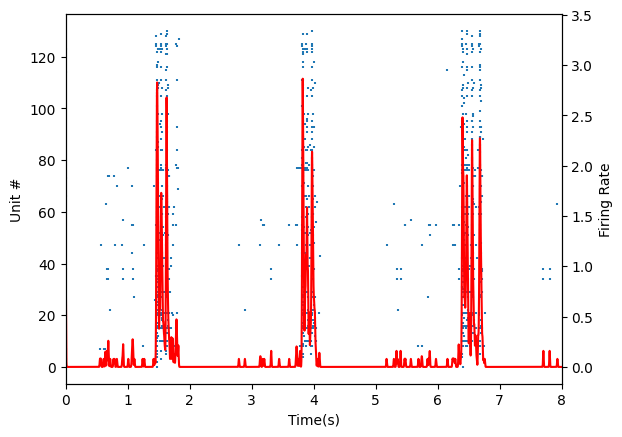

In [42]:
raster_analysis(data_diazepam, seconds=8)


In the control condition, bursts are broader and less synchronized, with spikes inside of each burst spread out across time and with more variability in neuronal participation. The population firing rate curve often shows internal fluctuations, which suggests subgroups of neurons firing at slightly different times. 

Bursts under diazepam are tighter and more uniform, with spikes from many neurons occurring almost simultaneously. This results in sharp, clean peaks in the firing rate profile. Again, this aligns with diazepam's promotion of more temporally precise, rhythmically organized neural activity — a feature also illustrated in Tal's Figure 4.

### Replicate Correlation and ISI (1.5 Points) <font color="green"> 

Plot the correlation matrix and the ISI histogram for the diazepam dataset. Briefly compare these plots to those from the control dataset.

<font color="green"><b>Answer <font color="red"> 1.5/1.5

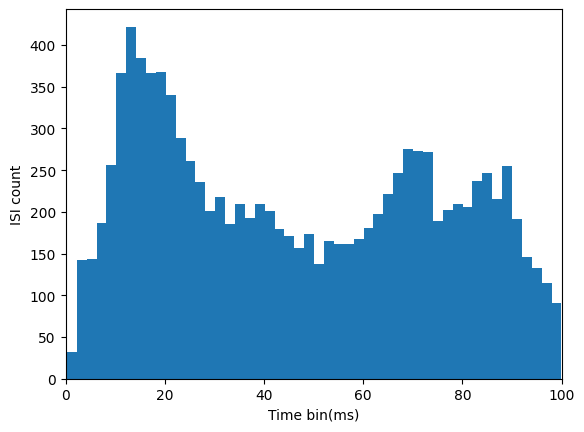

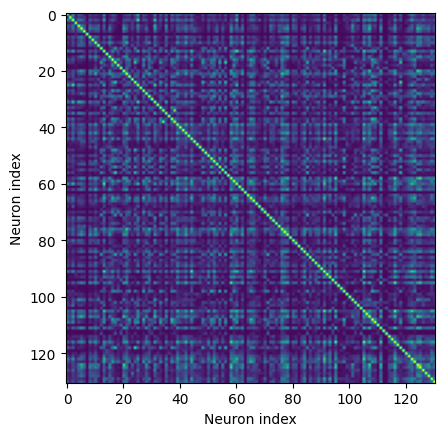

In [ ]:
interspike(data_diazepam)
correlation(data_diazepam)

__ISI Histograms Comparison:__
In the control dataset, the ISI histogram displays a steep decline, characteristic of a Poisson-like firing pattern, with most interspike intervals (ISIs) clustering under 20 ms. This suggests a high degree of firing randomness across neurons. 

The diazepam dataset shows a flatter ISI distribution with a more uniform spread and visible peaks, indicating more structured and regular firing patterns. This is consistent with the expected effect of diazepam, which is known to reduce firing variability and promote more synchronized activity.

__Correlation Matrix Comparison:__
Both datasets show a diagonal line (self-correlation), but the diazepam-treated dataset displays more prominent off-diagonal patterns, suggesting stronger pairwise correlations between neurons. This supports the notion that diazepam increases network coherence by enhancing synchronized firing between units. While the control matrix has a more evenly distributed and noisier appearance, the diazepam matrix appears to have more defined regions of correlation.

## Correlation & Spike Time Tilling (9.5 Points) <font color="red"> 9.5/9.5

### Correlation Matrix Equation

Given a matrix $X$, with $n$ random variables as its rows, write down the formula that the correlation matrix

<font color="green"><b>Answer <font color="red"> 1/1

Given a matrix $X \in \mathbb{R}^{n \times t}$, where each row represents a neuron (or random variable) and each column a time bin or observation, the Pearson correlation coefficient between two rows $i$ and $j$ is defined as:

$$
C_{ij} = \frac{\sum_{k=1}^{t} (X_{ik} - \bar{X}_i)(X_{jk} - \bar{X}_j)}{(t - 1) \cdot s_i \cdot s_j}
$$

where:

- $\bar{X}_i = \frac{1}{t} \sum_{k=1}^{t} X_{ik}$ is the mean of neuron $i$,
- $s_i = \sqrt{\frac{1}{t - 1} \sum_{k=1}^{t} (X_{ik} - \bar{X}_i)^2}$ is the standard deviation of neuron $i$,
- $C_{ij} \in [-1, 1]$ is the entry in the correlation matrix $C$ corresponding to neurons $i$ and $j$.

The full correlation matrix $C \in \mathbb{R}^{n \times n}$ contains the pairwise Pearson correlation coefficients between all neuron pairs.


### Diagonal of Correlation Matrix (1 Point)

What are the values on the diagonal of the correlation matrix? Why?

<font color="orange">**Hint:** If you need to, you can check the values of the diagonal in the source code. This is not necessary to receive full credit though.

<font color="green"><b>Answer <font color="red"> 1/1

In [ ]:
from scipy.ndimage import gaussian_filter1d
import numpy as np

# Define a helper function to compute the diagonal of the Pearson correlation matrix
def get_corr_diagonal(sd):
    raster = sd.raster(bin_size=1).astype(float)
    smoothed = gaussian_filter1d(raster, sigma=5)
    corr_matrix = np.corrcoef(smoothed)
    return np.diag(corr_matrix)

# Use the function on both datasets
diag_control = get_corr_diagonal(data_control)
diag_diazepam = get_corr_diagonal(data_diazepam)

# Print unique diagonal values for both
print("All control diagonals ≈ 1:", np.allclose(diag_control, 1.0))
print("All diazepam diagonals ≈ 1:", np.allclose(diag_diazepam, 1.0))

All control diagonals ≈ 1: True
All diazepam diagonals ≈ 1: True


In a Pearson correlation matrix, the values along the __main diagonal__ (left to right) are all equal to 1. This is because the diagonal entries represent the correlation of each variable (or neuron) with itself:

$$
C_{ii} = \text{corr}(X_i, X_i) = 1
$$

This holds for all $i$, since the correlation of any variable with itself is always perfect.

Formally, the Pearson correlation between a variable and itself is:

$$
\text{corr}(X_i, X_i) = \frac{\text{Cov}(X_i, X_i)}{\sigma_i \cdot \sigma_i} = \frac{\sigma_i^2}{\sigma_i^2} = 1
$$

Hence, the main diagonal (top-left to bottom-right) of the correlation matrix consists entirely of ones.

While some matrices (such as rotation or transformation matrices) may contain negative values like $-1$ on their diagonals, this is not the case for Pearson correlation matrices. The values $-1$ in a correlation matrix occur __off-diagonal__(right to left), and they indicate perfect anticorrelation between two different variables.


### Why STTC? (1.5 Points)

Briefly read through the paper on [spike time tilling](./reading_material/Spike_Time_Tiling.pdf). For electrophysiology, what is the advantage of using spike time tiling over correlation?

<font color="green"><b>Answer <font color="red"> 1.5/1.5

Traditional Pearson correlation can be biased by firing rate: neurons that fire more frequently tend to have higher correlation values simply due to more data points.

STTC corrects for this by taking into account both the precise timing of spikes and the probability of coincident spiking by chance, making it a better measure of true temporal synchrony.

STTC is also less sensitive to firing rate variability and can detect meaningful relationships in sparse spiking data, which is common in brain organoid recordings or early developmental stages.

So in essence, STTC gives a more accurate, rate-independent estimate of functional connectivity, especially in systems with variable or low firing rates.

### Plot STTC (2 Points)

Use the braingeneerspy package's [analysis code](https://github.com/braingeneers/braingeneerspy/blob/master/src/braingeneers/analysis/analysis.py) to create a plot of the STTC for both the control dataset and the diazepam dataset. 

<font color="orange"><b>Hint:</b> This is the same package used in the source code to create the other plots. You only need to write 2 lines of code to complete this exercise. In the code, by default `delt=20`, leave it that way.

<font color="green"><b>Answer <font color="red"> 2/2

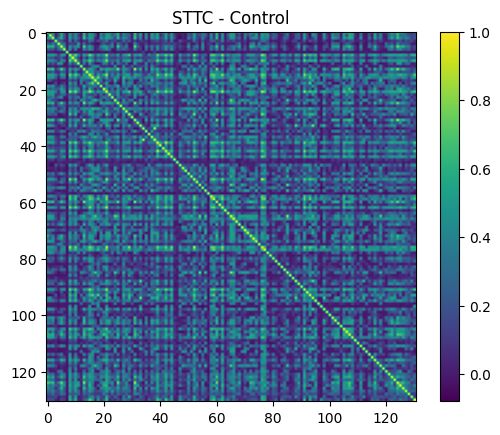

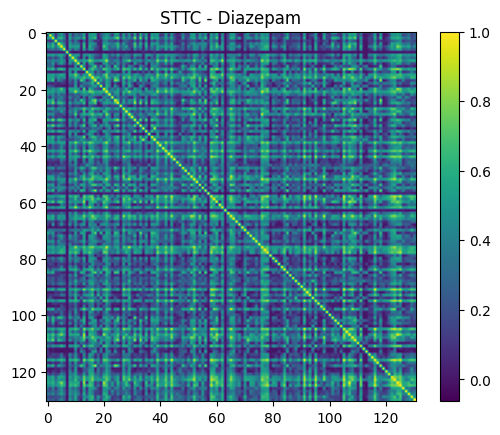

In [ ]:
plt.imshow(data_control.spike_time_tilings(), cmap='viridis'); plt.title('STTC - Control'); plt.colorbar(); plt.show()
plt.imshow(data_diazepam.spike_time_tilings(), cmap='viridis'); plt.title('STTC - Diazepam'); plt.colorbar(); plt.show()

### Compare Plots (1.5 Points)

Compare the two plots of the STTC. Does the variation between these plots make sense, considering our understanding of diazepam? Explain. Is the comparison between these two plots consistent with the variation you see between the correlation matrices of both datasets?

<font color="green"><b>Answer <font color="red"> 1.5/1.5

Yes, the variation observed between the two Spike Time Tiling Coefficient (STTC) plots is consistent with our understanding of diazepam's effect on neuronal networks. Diazepam is known to increase inhibitory tone in neural circuits, which reduces overall neural activity but promotes more synchronized and regular firing patterns across neurons. This is evident in the STTC matrix for the diazepam dataset, which shows stronger and more widespread pairwise correlations between neurons, suggesting increased network coordination and connectivity.

In contrast, the control dataset’s STTC matrix appears to have a lower overall correlation between neuron pairs, indicating more variable or independent firing. This aligns with the expectation that untreated brain organoids exhibit more spontaneous and less coordinated activity patterns.

This observation is also consistent with the differences seen in the Pearson correlation matrices: the diazepam-treated data showed stronger and more uniform pairwise correlations, while the control data displayed more heterogeneous, patchy correlation patterns. Together, both the STTC and Pearson correlation results reinforce the conclusion that diazepam fosters a more organized and coherent spiking network, despite overall decreased spike rates.









### Diagonal of STTC (1.5 Points)

What do the diagonal values of the STTC equal. Why is this the case?

<font color="green"><b>Answer <font color="red"> 1.5/1.5

In [48]:
# Compute STTC matrix for control dataset (you can do same for diazepam)
sttc_matrix = data_control.spike_time_tilings()

# Extract diagonal values
diagonal_values = np.diag(sttc_matrix)

# Print unique diagonal values
print("Unique diagonal values:", np.unique(diagonal_values))


Unique diagonal values: [1.]


The Spike Time Tiling Coefficient (STTC), as defined by Cutts & Eglen (2014), is given by:

$$
\text{STTC} = \frac{1}{2} \left( \frac{P_A - T_B}{1 - P_A T_B} + \frac{P_B - T_A}{1 - P_B T_A} \right)
$$

Where:

- $P_A$ is the proportion of spikes in train $A$ that fall within $\pm \Delta t$ of any spike in train $B$,
- $T_A$ is the proportion of the total recording time that lies within $\pm \Delta t$ of any spike in train $A$,
- Likewise for $P_B$ and $T_B$.


If we compute the STTC between a spike train and itself (i.e., $A = B$), then:

- Every spike in $A$ lies within $\pm \Delta t$ of itself, so $P_A = P_B = 1$,
- The proportion of time covered by the windows around spikes is the same for both trains: $T_A = T_B$.

Substituting into the formula:

$$
\text{STTC}(A, A) = \frac{1}{2} \left( \frac{1 - T_A}{1 - T_A} + \frac{1 - T_A}{1 - T_A} \right) = \frac{1}{2}(1 + 1) = 1
$$

Thus, __the diagonal values of the STTC matrix are always 1, because a spike train is perfectly temporally correlated with itself:__

$$
\text{STTC}_{ii} = 1 \quad \forall i
$$
